In [12]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [58]:
data = pd.read_csv('/content/drive/MyDrive/NLPCourse/NLPFinal/ProcessedPR.csv')

In [63]:
data.head()

,Unnamed: 0,Date,Member,Party,State / District,Title,Press Release,sentences,docTokens
0,0,May 12,Ayanna Pressley,D,Mass.-7,"WATCH: In Powerful Mothers Day Speech, Pressle...","May 12, 2024 “Mr. Speaker, mothers across Amer...","['may mr', 'speaker mother across america want...",may mr speaker mother across america want hall...
1,1,May 10,Adrian Smith,R,Neb.-3,Pushing Back on Unworkable Executive Mandates,"502 Cannon HOB, Washington, DC 20515Email Me(2...",['cannon hob washington dc president obama fam...,cannon hob washington dc president obama famou...
2,2,May 9,Robert E. Latta,R,Ohio-5,Latta's Op-Ed: EPAs new power plant rule is ne...,Congressman Bob Latta (R-OH5) penned an op-ed ...,['congressman bob latta penned washington exam...,congressman bob latta penned washington examin...
3,3,May 10,Morgan Griffith,R,Va.-9,Congressman Griffiths Weekly E-Newsletter 5.10.24,It has been roughly four and a half years sinc...,['roughly four half year since start pandemic ...,roughly four half year since start pandemic de...
4,4,May 3,Steve Cohen,D,Tenn.-9,Celebrating the Grand Opening of the Orange Mo...,"May 3, 2024 Dear Friend, Last Friday, I atte...",['may dear friend last friday attended grand o...,may dear friend last friday attended grand ope...


In [60]:
data['docTokens'].isna().value_counts()

docTokens
False    985
True       4
Name: count, dtype: int64

In [ ]:
import pandas as pd
data = data.dropna(subset=['docTokens'])

## TD-IDF - based on full documents

In [6]:
from sklearn.model_selection import train_test_split

X_train, x_val, y_train, y_val = train_test_split(data['docTokens'], data['Party'], test_size=0.2, stratify=data['Party'])
print(f'Training samples: {len(X_train)}')
print(f'Validation samples: {len(x_val)}')

Training samples: 788
Validation samples: 197


In [7]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

y_train_ohe = ohe.fit_transform(y_train.values.reshape(-1, 1))
y_val_ohe = ohe.transform(y_val.values.reshape(-1, 1))

print(f'One hot encoded training labels shape: {y_train_ohe.shape}')
print(f'One hot encoded validation labels shape: {y_val_ohe.shape}')

One hot encoded training labels shape: (788, 2)
One hot encoded validation labels shape: (197, 2)


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_le = label_encoder.fit_transform(y_train)
y_val_le = label_encoder.transform(y_val)

print(f'Label encoded training labels shape: {y_train_le.shape}')
print(f'Label encoded validation labels shape: {y_val_le.shape}')

Label encoded training labels shape: (788,)
Label encoded validation labels shape: (197,)


In [9]:
for i in range(5):
    print(f'Original label: {y_train.iloc[i]} - Label encoded: {y_train_le[i]}')

Original label: R - Label encoded: 1
Original label: R - Label encoded: 1
Original label: R - Label encoded: 1
Original label: D - Label encoded: 0
Original label: R - Label encoded: 1


In [10]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_

In [13]:
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear', C=1.0, random_state=42))
])

# fit the model
text_clf.fit(X_train, y_train_le)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(kernel='linear', random_state=42))])

In [14]:
text_clf.score(x_val, y_val_le)

0.8781725888324873

## RNN on full data based on documents

In [17]:
import random

# sample a random sentence from the training set
random_idx = random.randint(0, len(X_train))
print(f'Random Document: {X_train.iloc[random_idx]}')
print(f'Party: {y_train.iloc[random_idx]}')

Random Document: washington earl buddy carter andrew clyde today introduced resolution declaring april day tax day fairtax day fairtax act bill would replace current tax code national consumption tax eliminating internal revenue service irs tax day establishing national fairtax day come directly united state traditional tax day resolution signal readiness begin new fair process give people power paycheck american spend six billion hour per year filing tax instead putting dollar straight uncle sam pocket fairtax allows keep paycheck choose much pay tax every year simple fair preferred alternative current system punishes success put unelected bureaucrat charge paycheck let make april last tax day ever time change fairtax day raise awareness popular proposal said carter fairtax would create simplified fair tax code american would also foster economic prosperity eliminate need irs become weaponized staunch supporter carter fairtax act proud join fellow georgian raising awareness commonsens

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

y_train_ohe = ohe.fit_transform(y_train.values.reshape(-1, 1))
y_val_ohe = ohe.transform(y_val.values.reshape(-1, 1))

print(f'One hot encoded training labels shape: {y_train_ohe.shape}')
print(f'One hot encoded validation labels shape: {y_val_ohe.shape}')

One hot encoded training labels shape: (788, 2)
One hot encoded validation labels shape: (197, 2)


In [19]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Create a TextVectorization layer
text_vectorizer = TextVectorization(
    max_tokens=8000,  # Maximum size of the vocabulary
    output_mode='int',          # Output the token indices as integers
    output_sequence_length=600,  # Length of output sequences
    pad_to_max_tokens=True      # Pad sequences to max_tokens
)

In [20]:
import random

text_vectorizer.adapt(X_train.values)

example_sent = random.choice(X_train.values)
print(f'Original text:\n{example_sent}')
print(f'\nVectorized text:\n{text_vectorizer([example_sent])}')
print('Length of vector:', len(text_vectorizer([example_sent]).numpy()[0]))

Original text:
washington congressman bob good introduced iran china accountability act prevent biden administration entering disastrous nuclear agreement iran bill block taxpayer dollar used advance nuclear agreement iran iran terminated cash tie china requires iran terminate tie terrorist group like hamas president biden effectively abandoned important friend ally middle east israel early day since hamas terrorist brutally attacked biden pressuring israel surrender said good meanwhile biden waived sanction iran releasing billion dollar iran china accountability act condemns terrorist attack mandate rigorous process potential nuclear agreement iran among provision bill good continued iran china seek america downfall legislation hold chinese communist party accountable ensure biden never failed nuclear agreement mary miller andy ogles barry moore clay higgins supporting group endowment middle east truth emet zionist organization america zoa west particularly united state israel enterin

In [21]:
vocab = text_vectorizer.get_vocabulary()
print(f'Number of words in the vocabulary: {len(vocab)}')
print(f'Most common words in the vocabulary: {vocab[:5]}')
print(f'Least common words in the vocabulary: {vocab[-5:]}')

Number of words in the vocabulary: 8000
Most common words in the vocabulary: ['', '[UNK]', 'senator', 'said', 'act']
Least common words in the vocabulary: ['powerlines', 'powerhouse', 'possessing', 'posing', 'portrayal']


In [22]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 8000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 600,
 'pad_to_max_tokens': True,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 8000}

In [23]:
token_embedding = tf.keras.layers.Embedding(input_dim=len(vocab),
                                            output_dim=128,
                                            mask_zero=True,
                                            name='token_embedding')

print(f'Sentence before vectorization: {example_sent}')
vectorized_sent = text_vectorizer(example_sent)
print(f'Sentence after vectorization: {vectorized_sent}')
embedded_sent = token_embedding(vectorized_sent)
print(f'Sentence after embedding: {embedded_sent}')

Sentence before vectorization: washington congressman bob good introduced iran china accountability act prevent biden administration entering disastrous nuclear agreement iran bill block taxpayer dollar used advance nuclear agreement iran iran terminated cash tie china requires iran terminate tie terrorist group like hamas president biden effectively abandoned important friend ally middle east israel early day since hamas terrorist brutally attacked biden pressuring israel surrender said good meanwhile biden waived sanction iran releasing billion dollar iran china accountability act condemns terrorist attack mandate rigorous process potential nuclear agreement iran among provision bill good continued iran china seek america downfall legislation hold chinese communist party accountable ensure biden never failed nuclear agreement mary miller andy ogles barry moore clay higgins supporting group endowment middle east truth emet zionist organization america zoa west particularly united stat

In [24]:
X_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train_ohe))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val.values, y_val_ohe))

In [25]:

BATCH_SIZE = 15

In [26]:
train_dataset = X_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [30]:
# MODEL Hyperparameters
learning_rate = 0.0001
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate)
loss = 'categorical_crossentropy'
epochs = 14

In [31]:
# Model architecture

from tensorflow.keras import layers, regularizers

inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)

x = token_embedding(x)
x = tf.keras.layers.Flatten()(x)


outputs = layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [32]:
history = model.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

Epoch 1/14
53/53 [==============================] - 3s 41ms/step - loss: 0.6751 - accuracy: 0.5761 - val_loss: 0.6784 - val_accuracy: 0.5584
Epoch 2/14
53/53 [==============================] - 3s 56ms/step - loss: 0.5861 - accuracy: 0.8096 - val_loss: 0.6599 - val_accuracy: 0.5635
Epoch 3/14
53/53 [==============================] - 2s 45ms/step - loss: 0.5155 - accuracy: 0.9277 - val_loss: 0.6392 - val_accuracy: 0.6599
Epoch 4/14
53/53 [==============================] - 2s 40ms/step - loss: 0.4497 - accuracy: 0.9556 - val_loss: 0.6167 - val_accuracy: 0.7056
Epoch 5/14
53/53 [==============================] - 2s 38ms/step - loss: 0.3887 - accuracy: 0.9746 - val_loss: 0.5929 - val_accuracy: 0.7259
Epoch 6/14
53/53 [==============================] - 3s 49ms/step - loss: 0.3335 - accuracy: 0.9784 - val_loss: 0.5688 - val_accuracy: 0.7614
Epoch 7/14
53/53 [==============================] - 3s 51ms/step - loss: 0.2850 - accuracy: 0.9822 - val_loss: 0.5452 - val_accuracy: 0.7868
Epoch 8/14
53

In [39]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

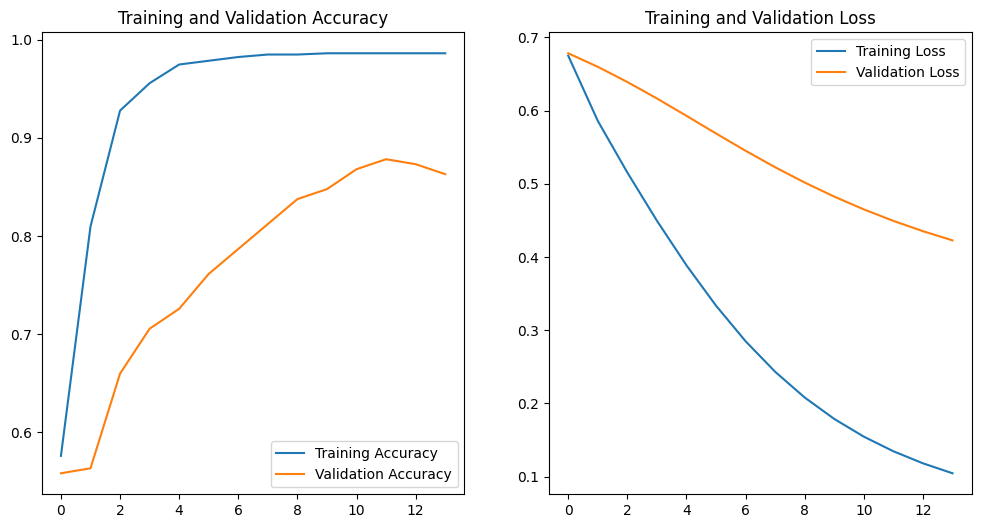

In [40]:
plot_history(history)